In [3]:
import os
import glob
import pandas as pd

df=pd.read_csv('Combined_Data.csv')

In [4]:
os.listdir()

['.ipynb_checkpoints',
 '2_label.csv',
 'Combined_Data.csv',
 'Last Try.ipynb',
 'Untitled.ipynb']

In [5]:
data = pd.read_csv("combined_data.csv", index_col ="label")
  
# retrieving row by loc method
first = data.loc[9]
first

C:\Users\Omkar Kadam\Conda\envs\gpu2\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,time,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,mag_x,mag_y,mag_z
label,,,,,,,,,,
9,1628413520,-0.379883,-0.940918,-0.058105,3.112793,-2.502441,-1.403809,1.5,144.0,-441.0
9,1628413520,-0.382812,-0.944336,-0.061035,1.953125,-2.014160,-0.854492,-10.5,133.5,-424.5
9,1628413520,-0.381836,-0.939453,-0.062988,0.976563,-2.380371,-0.244141,-21.0,133.5,-435.0
9,1628413520,-0.380371,-0.938965,-0.069336,1.770020,-2.380371,0.488281,-21.0,121.5,-429.0
9,1628413520,-0.384766,-0.940430,-0.067383,2.441406,-1.708984,-0.915527,-9.0,126.0,-409.5
...,...,...,...,...,...,...,...,...,...,...
9,1628330340,-0.231445,0.967774,0.025879,-0.305176,-2.014160,-1.708984,-238.5,1369.5,571.5
9,1628330340,-0.227051,0.971192,0.031738,-0.305176,-3.540039,-1.892090,-244.5,1365.0,559.5
9,1628330340,-0.225098,0.965820,0.023926,-0.549316,-2.624512,-2.014160,-259.5,1354.5,555.0


<AxesSubplot:xlabel='label', ylabel='count'>

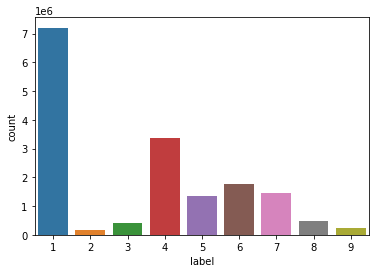

In [8]:
import seaborn as sns
import matplotlib as plt
%matplotlib inline
sns.countplot(data=df,x="label")

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data)

StandardScaler()

In [12]:
scaled_fea = scaler.fit_transform(data)

In [14]:
df_1=pd.DataFrame(scaled_fea,columns=df.columns[:10])
df_1.head()

,time,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,mag_x,mag_y,mag_z
0,0.646809,-0.754574,-1.941114,0.941471,0.511331,-0.059999,-0.730177,0.433733,-0.794948,-1.589051
1,0.646809,-0.716496,-1.970954,0.752171,0.494012,0.255779,-0.740572,0.318776,-0.782552,-1.578601
2,0.646809,-0.722508,-1.940492,0.848154,0.437724,0.325357,-0.813332,0.312390,-0.799907,-1.564668
3,0.646809,-0.742550,-1.913138,0.973466,0.372777,0.338738,-0.828924,0.389028,-0.770155,-1.606468
4,0.646809,-0.790649,-1.925572,1.016125,0.203913,0.306625,-0.787346,0.337936,-0.765196,-1.571635


In [15]:
df_1.drop('time', inplace=True, axis=1)

In [16]:
df_1.head()

,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,mag_x,mag_y,mag_z
0,-0.754574,-1.941114,0.941471,0.511331,-0.059999,-0.730177,0.433733,-0.794948,-1.589051
1,-0.716496,-1.970954,0.752171,0.494012,0.255779,-0.740572,0.318776,-0.782552,-1.578601
2,-0.722508,-1.940492,0.848154,0.437724,0.325357,-0.813332,0.312390,-0.799907,-1.564668
3,-0.742550,-1.913138,0.973466,0.372777,0.338738,-0.828924,0.389028,-0.770155,-1.606468
4,-0.790649,-1.925572,1.016125,0.203913,0.306625,-0.787346,0.337936,-0.765196,-1.571635


In [17]:
X=df_1
y=df["label"]

In [18]:
X=X.to_numpy()
y=y.to_numpy()

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [22]:
print(X_train.shape)
print(X_test.shape)

(11469073, 9)
(4915318, 9)


In [50]:
from keras.utils.np_utils import to_categorical
y_train = to_categorical(y_train)
y_test  = to_categorical(y_test)


In [51]:
print(y_train.shape)
print(y_test.shape)

(11469073, 10)
(4915318, 10)


In [53]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000, )))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

# Model Compilation
model.compile(optimizer = 'rmsprop',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

AttributeError: module 'tensorflow.compat.v2' has no attribute '__internal__'